##  Imports

In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = "https://api.coingecko.com/api/v3/"
url_bitcoins = "coins/bitcoin/market_chart?vs_currency=usd&days=30"
url = base + url_bitcoins

In [3]:
result = requests.get(url)
# request type, get the information from a url/api
result
# Response [200] = The request was fulfilled.

<Response [200]>

In [4]:
# use the json library to parse the result
json_bitcoin = result.json()
# dict type, time unit in epoch
json_bitcoin["prices"]

[[1584014986151, 6144.756908990129],
 [1584018579369, 6188.118319567268],
 [1584022181030, 6024.638312484096],
 [1584025788620, 6203.816581676148],
 [1584029060383, 6124.034249524516],
 [1584032659969, 6136.414231744155],
 [1584036537940, 6206.673855629911],
 [1584039779083, 6168.008868860342],
 [1584043450707, 6087.757406643118],
 [1584046976609, 5836.266509166428],
 [1584050642090, 5882.179229266491],
 [1584054437728, 5962.643444394527],
 [1584057929357, 5154.338866193685],
 [1584061651105, 5001.449867044637],
 [1584065376096, 4685.409796002376],
 [1584068979919, 5307.220541855973],
 [1584072559152, 5382.342710923869],
 [1584075872404, 4914.721860061853],
 [1584079438457, 5027.225774315244],
 [1584083118206, 5391.346368562889],
 [1584086662749, 5671.5456025902],
 [1584090560173, 5311.97945451216],
 [1584094070622, 5838.575710800006],
 [1584097760416, 5695.503311123822],
 [1584101085233, 5561.228291939664],
 [1584104727723, 5591.6127194207465],
 [1584108554744, 5666.864523238146],
 [1

In [5]:
# transform the dict into a df
df_bitcoin = pd.DataFrame(json_bitcoin['prices'], columns=['time', 'price'])
df_bitcoin.head(10)

,time,price
0,1584014986151,6144.756909
1,1584018579369,6188.118320
2,1584022181030,6024.638312
3,1584025788620,6203.816582
4,1584029060383,6124.034250
5,1584032659969,6136.414232
6,1584036537940,6206.673856
7,1584039779083,6168.008869
8,1584043450707,6087.757407
9,1584046976609,5836.266509


In [6]:
dogecoin_url = "coins/dogecoin/market_chart"
url = base + dogecoin_url

In [7]:
# instead of writing the url with the parameters
# we define a dict with the paramaters and it will be passed using get url
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}

In [8]:
result = requests.get(url, params=param_dict)
result

<Response [200]>

In [9]:
json_dogecoin = result.json()
json_dogecoin["prices"]

[[1584014672127, 0.0016750115349548947],
 [1584018251269, 0.0016720053254056565],
 [1584021800251, 0.0016381706783309999],
 [1584025468575, 0.001713287131357113],
 [1584029177781, 0.0017563063573646433],
 [1584032760511, 0.0017995611731917798],
 [1584036477709, 0.0018260583681243884],
 [1584039982593, 0.0018059085077188333],
 [1584043661179, 0.001769610506597958],
 [1584047262998, 0.0016867863854005637],
 [1584050683689, 0.0016955067362352818],
 [1584054232014, 0.0017076198138631733],
 [1584057753762, 0.0014834682898671341],
 [1584061514179, 0.0014405582705284622],
 [1584065100858, 0.0013670120289183717],
 [1584068423291, 0.0014425968868855932],
 [1584072281599, 0.0015073216394493503],
 [1584075873620, 0.0014338279422794495],
 [1584079481255, 0.0014842665379057826],
 [1584083086423, 0.0015062034074154681],
 [1584086742952, 0.0015865220984130448],
 [1584090545511, 0.0015634708917206016],
 [1584093869702, 0.001678190980312144],
 [1584097752538, 0.0016558111736007844],
 [1584101158621, 0.

In [10]:
df_dogecoin = pd.DataFrame(json_dogecoin["prices"], columns=["time", "price"])
df_dogecoin.head(10)

,time,price
0,1584014672127,0.001675
1,1584018251269,0.001672
2,1584021800251,0.001638
3,1584025468575,0.001713
4,1584029177781,0.001756
5,1584032760511,0.001800
6,1584036477709,0.001826
7,1584039982593,0.001806
8,1584043661179,0.001770
9,1584047262998,0.001687


In [11]:
# transform the time unit into ms
df_dogecoin["time"] = pd.to_datetime(df_dogecoin["time"], unit="ms")
df_bitcoin["time"] = pd.to_datetime(df_bitcoin["time"], unit="ms")
# set time as index
df_dogecoin.set_index("time", inplace = True)
df_bitcoin.set_index("time", inplace = True)
df_dogecoin.head(10)

,price
time,
2020-03-12 12:04:32.127,0.001675
2020-03-12 13:04:11.269,0.001672
2020-03-12 14:03:20.251,0.001638
2020-03-12 15:04:28.575,0.001713
2020-03-12 16:06:17.781,0.001756
2020-03-12 17:06:00.511,0.001800
2020-03-12 18:07:57.709,0.001826
2020-03-12 19:06:22.593,0.001806
2020-03-12 20:07:41.179,0.001770


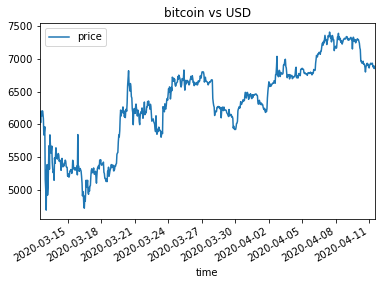

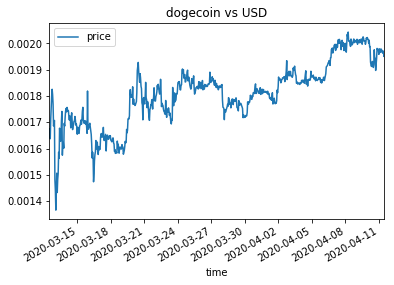

In [12]:
df_bitcoin.plot(title="bitcoin vs USD")
df_dogecoin.plot(title="dogecoin vs USD");

# Litecoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [13]:
# define url
litecoin_url = "coins/litecoin/market_chart"
url = base + litecoin_url
# define parameters
param_dict = { 'id':'litecoin', 'vs_currency':'usd', 'days':30}
# get result
result = requests.get(url, params = param_dict)
result
# result 200: request fulfilled

<Response [200]>

In [14]:
# get json into a dict
json_litecoin = result.json()
json_litecoin

{'prices': [[1584014869875, 34.11854692415938],
  [1584018455123, 33.49966234010493],
  [1584022061318, 31.930529334569073],
  [1584025232839, 34.569979516009546],
  [1584029039726, 34.75781152974667],
  [1584032551029, 34.31282020121135],
  [1584036458110, 35.876987692211635],
  [1584039953027, 35.083943062699845],
  [1584043388978, 35.10203185545124],
  [1584047354846, 32.895319977071104],
  [1584050836395, 33.85277541892737],
  [1584054447086, 33.52314601307213],
  [1584058052461, 30.447903790801497],
  [1584061644240, 29.055079422067166],
  [1584065344383, 27.081736965599195],
  [1584068843643, 30.71221808087339],
  [1584072557321, 32.23250271235734],
  [1584076176939, 29.784416044487784],
  [1584079792897, 30.954629409169925],
  [1584083357569, 32.90152733974642],
  [1584086955209, 34.4266620621372],
  [1584090558457, 33.562502086834485],
  [1584094173055, 35.52630372674676],
  [1584097638369, 35.25587973105782],
  [1584101058150, 34.44364443400166],
  [1584104642325, 36.252830599

In [15]:
# get the dict into a df
df_litecoin = pd.DataFrame(json_litecoin["prices"], columns = ["time", "price"])

In [16]:
# transform time into ms 
df_litecoin["time"] = pd.to_datetime(df_litecoin["time"], unit="ms")
# and set as index
df_litecoin.set_index("time", inplace = True)
df_litecoin

,price
time,
2020-03-12 12:07:49.875,34.118547
2020-03-12 13:07:35.123,33.499662
2020-03-12 14:07:41.318,31.930529
2020-03-12 15:00:32.839,34.569980
2020-03-12 16:03:59.726,34.757812
...,...
2020-04-11 08:09:20.462,42.658216
2020-04-11 09:09:23.236,42.628264
2020-04-11 10:07:14.453,42.542211


## Plot Litecoin and Dogecoin prices in a lineplot for each

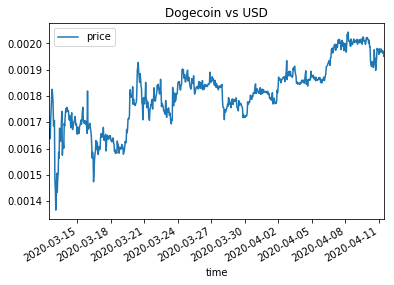

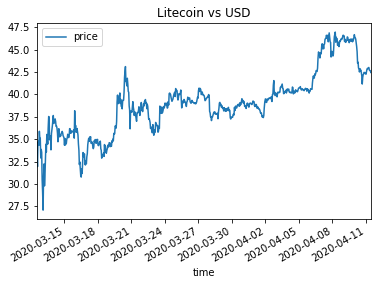

In [17]:
df_dogecoin.plot(title = "Dogecoin vs USD")
df_litecoin.plot(title = "Litecoin vs USD");

# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

In [18]:
coins_list = "coins/list"
url = base + coins_list
result = requests.get(url)
result

<Response [200]>

In [19]:
json_coins = result.json()
json_coins

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '02-token', 'symbol': 'o2t', 'name': 'O2 Token'},
 {'id': '0cash', 'symbol': 'zch', 'name': '0cash'},
 {'id': '0chain', 'symbol': 'zcn', 'name': '0chain'},
 {'id': '0x', 'symbol': 'zrx', 'name': '0x'},
 {'id': '0xcert', 'symbol': 'zxc', 'name': '0xcert'},
 {'id': '0xdark', 'symbol': 'oxd', 'name': '0xDark'},
 {'id': '0xeth-cash', 'symbol': '0xech', 'name': '0xETH Cash'},
 {'id': '0xeth-classic', 'symbol': '0xetc', 'name': '0xETH Classic'},
 {'id': '0xethereum-token', 'symbol': '0xeth', 'name': '0xEthereum Token'},
 {'id': '0xeth-sv', 'symbol': '0xesv', 'name': '0xETH SV'},
 {'id': '0xmaker-token', 'symbol': '0xmkr', 'name': '0xMaker Token'},
 {'id': '10m-token', 'symbol': '10mt', 'name': '10M Token'},
 {'id': '10x-long-algorand-token',
  'symbol': 'algomoon',
  'name': '10X Long Algorand Token'},
 {'id': '10x-long-altcoin-index-token',
  'symbol': 'altmoon',
  'name': '10X Long Altcoin Index Token'},
 {'id': '10x-long-bitcoi

In [20]:
df_coins = pd.DataFrame(json_coins)
df_coins.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,02-token,o2t,O2 Token
2,0cash,zch,0cash
3,0chain,zcn,0chain
4,0x,zrx,0x
5,0xcert,zxc,0xcert
6,0xdark,oxd,0xDark
7,0xeth-cash,0xech,0xETH Cash
8,0xeth-classic,0xetc,0xETH Classic
9,0xethereum-token,0xeth,0xEthereum Token


In [21]:
# series of the first 10 coins
coin_names = df_coins.iloc[:10,0]
coin_names

0              01coin
1            02-token
2               0cash
3              0chain
4                  0x
5              0xcert
6              0xdark
7          0xeth-cash
8       0xeth-classic
9    0xethereum-token
Name: id, dtype: object

In [22]:
# for loop to fetch the value of each currency and append to a dataframe

base = "http://api.coingecko.com/api/v3/coins/"
sufix = "/market_chart?vs_currency=usd&days=30"

coin_list = []

for i in coin_names:
    # build url
    url = base + i + sufix
    # file request
    result = requests.get(url)
    # parse json into dict
    json_i = result.json()
    # parse dict into df
    df_i = pd.DataFrame(json_i["prices"], columns = ["time", "price"])
    # add column coin_name to identify each value
    df_i["coin_name"] = i
    # add the df to the coin_list
    coin_list.append(df_i)
    
# concat list of df into a single df
coin_report = pd.concat(coin_list)
coin_report

,time,price,coin_name
0,1584015878742,1.002965e-03,01coin
1,1584019450888,9.894474e-04,01coin
2,1584023035457,9.559273e-04,01coin
3,1584026688421,9.925228e-04,01coin
4,1584030147019,9.855859e-04,01coin
...,...,...,...
2,1584486535855,8.489999e-13,0xethereum-token
3,1584497360286,8.397907e-13,0xethereum-token
4,1584961760413,8.397907e-13,0xethereum-token
5,1585404572987,8.397907e-13,0xethereum-token


In [23]:
# set time as index
coin_report.set_index("time", inplace = True)
coin_report

,price,coin_name
time,,
1584015878742,1.002965e-03,01coin
1584019450888,9.894474e-04,01coin
1584023035457,9.559273e-04,01coin
1584026688421,9.925228e-04,01coin
1584030147019,9.855859e-04,01coin
...,...,...
1584486535855,8.489999e-13,0xethereum-token
1584497360286,8.397907e-13,0xethereum-token
1584961760413,8.397907e-13,0xethereum-token


## Make a csv called 'top_ten_report.csv' and check that it worked

In [24]:
# create csv
coin_report.to_csv("coin_report.csv")

In [25]:
# check of reading the csv for test
test_coin_report = pd.read_csv("coin_report.csv")
test_coin_report

,time,price,coin_name
0,1584015878742,1.002965e-03,01coin
1,1584019450888,9.894474e-04,01coin
2,1584023035457,9.559273e-04,01coin
3,1584026688421,9.925228e-04,01coin
4,1584030147019,9.855859e-04,01coin
...,...,...,...
3505,1584486535855,8.489999e-13,0xethereum-token
3506,1584497360286,8.397907e-13,0xethereum-token
3507,1584961760413,8.397907e-13,0xethereum-token
3508,1585404572987,8.397907e-13,0xethereum-token
